# Imports and Utility functions

In [409]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk import PorterStemmer

[nltk_data] Downloading package punkt to /home/aleksandar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aleksandar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/aleksandar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [410]:
def get_vocabulary_list(column: pd.core.series.Series) -> list:
    vocabulary_list = list()
    for tokens_list in column.values:
        vocabulary_list.extend(tokens_list)
        
    return vocabulary_list

In [411]:
def to_countmap(items: list) -> dict:
    return Counter(items)

In [412]:
ENGLISH_STOPWORDS = stopwords.words('english')

# Task 1

In [413]:
df = pd.read_csv('data/trial.csv',delimiter="	")
df.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription
0,28.jpg,0,0,0,0,0,"not now, dad. We should burn Jon Snow. stop it..."
1,30.jpg,0,0,0,0,0,there may have been a mixcommunication with th...
2,33.jpg,0,0,0,0,0,i shouldn't have sold my boat
3,58.jpg,1,0,0,0,1,"Bitches be like, It was my fault i made him mad"
4,89.jpg,0,0,0,0,0,find a picture of 4 girls together on FB make ...


## Subtask A

In [414]:
def remove_punctuation(token:str)->str:
    punctuation_regex = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    return ' '.join(word.strip(punctuation_regex) for word in token.split())

def nlp_pipeline(token:str) -> str:
    token = remove_punctuation(token)
    tokens = word_tokenize(token.lower())
    tokens = [token for token in tokens if token not in ENGLISH_STOPWORDS]
    return tokens

In [415]:
df['Text Transription Tokens'] = df['Text Transcription'].apply(lambda x: nlp_pipeline(x))

In [416]:
df.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,Text Transription Tokens
0,28.jpg,0,0,0,0,0,"not now, dad. We should burn Jon Snow. stop it...","[dad, burn, jon, snow, stop, dad, know, happen..."
1,30.jpg,0,0,0,0,0,there may have been a mixcommunication with th...,"[may, mixcommunication, decorator, happy, birt..."
2,33.jpg,0,0,0,0,0,i shouldn't have sold my boat,"[n't, sold, boat]"
3,58.jpg,1,0,0,0,1,"Bitches be like, It was my fault i made him mad","[bitches, like, fault, made, mad]"
4,89.jpg,0,0,0,0,0,find a picture of 4 girls together on FB make ...,"[find, picture, 4, girls, together, fb, make, ..."


In [417]:
vocabulary_list = get_vocabulary_list(df['Text Transription Tokens'])

In [418]:
word_counts = to_countmap(vocabulary_list)
word_counts

Counter({'dad': 2,
         'burn': 1,
         'jon': 1,
         'snow': 3,
         'stop': 1,
         'know': 3,
         'happen': 1,
         'becomes': 1,
         'white': 4,
         'walker': 1,
         "'ll": 3,
         'become': 1,
         'may': 2,
         'mixcommunication': 1,
         'decorator': 1,
         'happy': 2,
         'birthday': 2,
         'dick': 1,
         'ha': 3,
         "n't": 15,
         'write': 1,
         'name': 1,
         'matt': 1,
         'sold': 1,
         'boat': 1,
         'bitches': 1,
         'like': 8,
         'fault': 1,
         'made': 2,
         'mad': 1,
         'find': 1,
         'picture': 1,
         '4': 1,
         'girls': 5,
         'together': 1,
         'fb': 1,
         'make': 4,
         'comemnt': 1,
         'three': 2,
         'look': 4,
         'pretty': 1,
         'circumcision': 2,
         'alright': 2,
         'child': 1,
         'wo': 1,
         'remember': 1,
         'date': 1,
       

In [419]:
f"Vocabulary size: {len(word_counts.keys())}"

'Vocabulary size: 470'

In [420]:
word_counts_sorted = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

In [421]:
most_frequent = dict(list(word_counts_sorted.items())[:20])

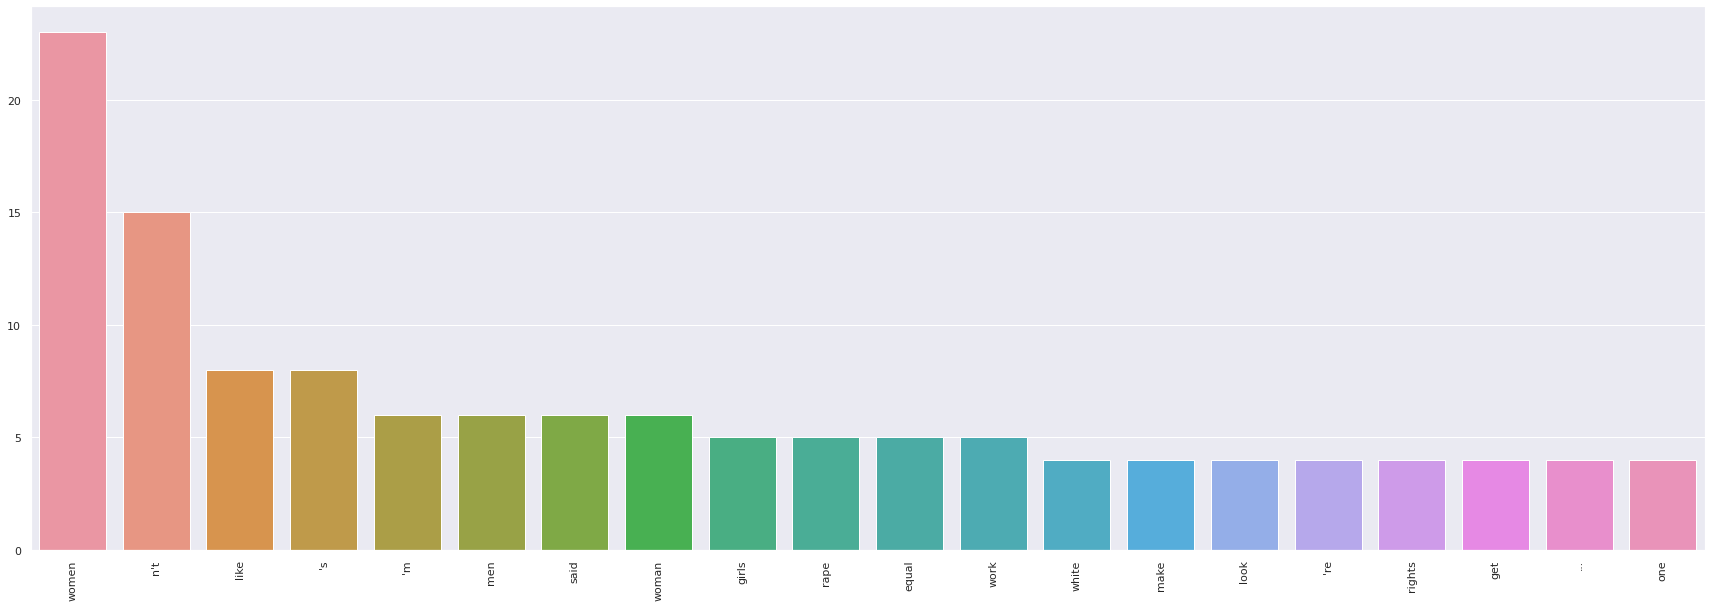

In [422]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x=list(most_frequent.keys()), y=list(most_frequent.values()))
ax.tick_params(axis='x', rotation=90)

## Subtask B

In [423]:
"""Removes the items which have values less than k, i.e. words which occure less than k-times"""
def remove_less_than(word_counts, k:int)->dict:
    return dict([item for item in word_counts.items() if item[1] >= k])

In [424]:
print(f"Vocabulary size: {len(word_counts.keys())}")
for k in [5, 10, 15]:
    filtered = remove_less_than(word_counts, k)
    print(f"\tVocabulary size with k={k}: {len(filtered.keys())}")

Vocabulary size: 470
	Vocabulary size with k=5: 12
	Vocabulary size with k=10: 2
	Vocabulary size with k=15: 2


In [425]:
word_counts_filtered = remove_less_than(word_counts, 5)

In [426]:
print(f"Vocabulary size: {len(word_counts_filtered.keys())}")

Vocabulary size: 12


## Subtask C

In [427]:
def lemmatize(word:str, tag=None) -> str:
    lemmatizer = WordNetLemmatizer()

    return lemmatizer.lemmatize(word,tag) if tag else  lemmatizer.lemmatize(word)

In [428]:
def stem(word:str) -> str:
    stemmer = PorterStemmer()
    return stemmer.stem(word)

In [429]:
df.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,Text Transription Tokens
0,28.jpg,0,0,0,0,0,"not now, dad. We should burn Jon Snow. stop it...","[dad, burn, jon, snow, stop, dad, know, happen..."
1,30.jpg,0,0,0,0,0,there may have been a mixcommunication with th...,"[may, mixcommunication, decorator, happy, birt..."
2,33.jpg,0,0,0,0,0,i shouldn't have sold my boat,"[n't, sold, boat]"
3,58.jpg,1,0,0,0,1,"Bitches be like, It was my fault i made him mad","[bitches, like, fault, made, mad]"
4,89.jpg,0,0,0,0,0,find a picture of 4 girls together on FB make ...,"[find, picture, 4, girls, together, fb, make, ..."


In [430]:
df['Text Transription Tokens (Lemmatized)'] = df['Text Transription Tokens'].apply(lambda x:[lemmatize(token) for token in x])

In [431]:
df['Text Transription Tokens (Stemmed)'] = df['Text Transription Tokens'].apply(lambda x:[stem(token) for token in x])

In [432]:
df.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,Text Transription Tokens,Text Transription Tokens (Lemmatized),Text Transription Tokens (Stemmed)
0,28.jpg,0,0,0,0,0,"not now, dad. We should burn Jon Snow. stop it...","[dad, burn, jon, snow, stop, dad, know, happen...","[dad, burn, jon, snow, stop, dad, know, happen...","[dad, burn, jon, snow, stop, dad, know, happen..."
1,30.jpg,0,0,0,0,0,there may have been a mixcommunication with th...,"[may, mixcommunication, decorator, happy, birt...","[may, mixcommunication, decorator, happy, birt...","[may, mixcommun, decor, happi, birthday, dick,..."
2,33.jpg,0,0,0,0,0,i shouldn't have sold my boat,"[n't, sold, boat]","[n't, sold, boat]","[n't, sold, boat]"
3,58.jpg,1,0,0,0,1,"Bitches be like, It was my fault i made him mad","[bitches, like, fault, made, mad]","[bitch, like, fault, made, mad]","[bitch, like, fault, made, mad]"
4,89.jpg,0,0,0,0,0,find a picture of 4 girls together on FB make ...,"[find, picture, 4, girls, together, fb, make, ...","[find, picture, 4, girl, together, fb, make, c...","[find, pictur, 4, girl, togeth, fb, make, come..."


### Lemmatized

In [433]:
vocabulary_list_lemmatized = get_vocabulary_list(df['Text Transription Tokens (Lemmatized)'])

In [434]:
word_counts_lemmatized = to_countmap(vocabulary_list_lemmatized)

In [435]:
word_counts_lemmatized_sorted = dict(sorted(word_counts_lemmatized.items(), key=lambda item: item[1], reverse=True))

In [436]:
word_counts_lemmatized_filtered = remove_less_than(word_counts_lemmatized, 5)

In [437]:
print(f"Vocabulary size: {len(word_counts_lemmatized_filtered.keys())}")

Vocabulary size: 11


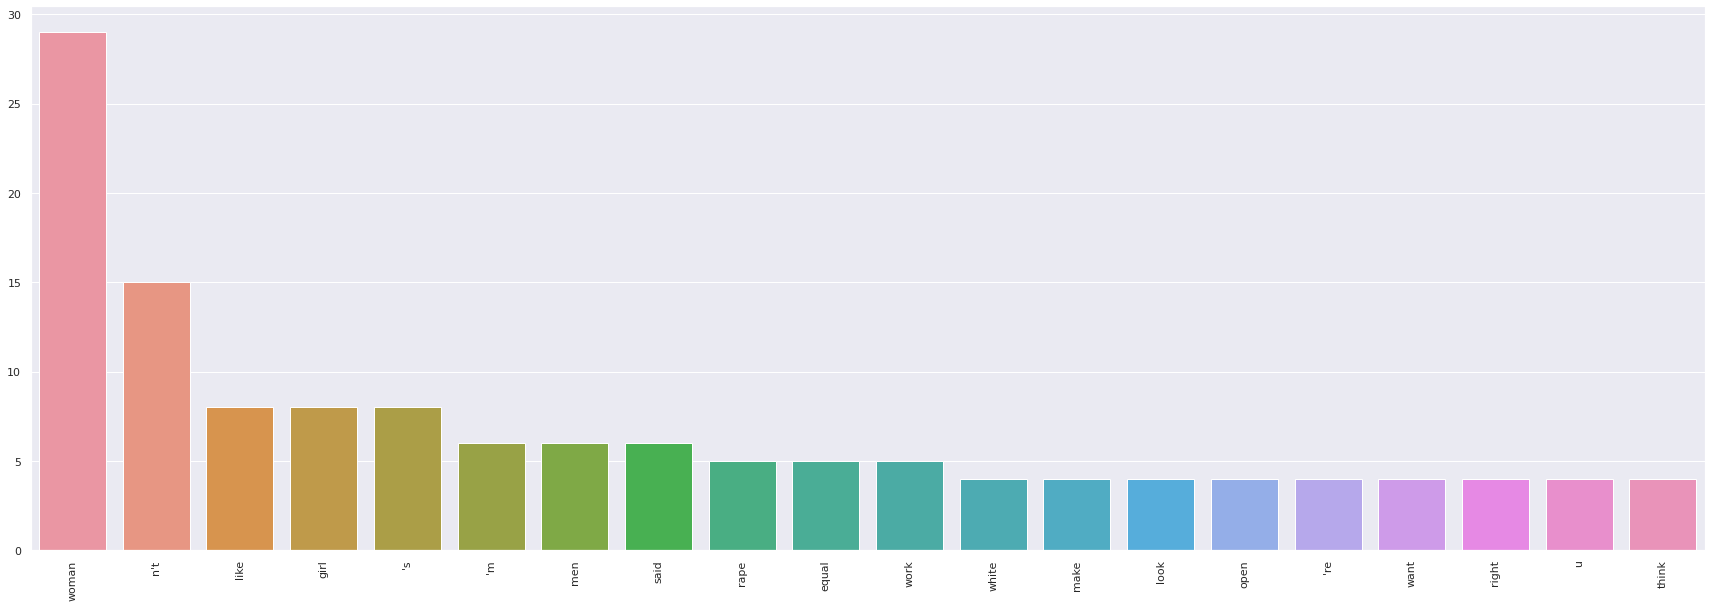

In [438]:
most_frequent = dict(list(word_counts_lemmatized_sorted.items())[:20])
plt.figure(figsize=(30,10))
ax = sns.barplot(x=list(most_frequent.keys()), y=list(most_frequent.values()))
ax.tick_params(axis='x', rotation=90)

### Stemmed

In [439]:
vocabulary_list_stemmed = get_vocabulary_list(df['Text Transription Tokens (Stemmed)'])

In [440]:
word_counts_stemmed = to_countmap(vocabulary_list_stemmed)

In [441]:
word_counts_stemmed_sorted = dict(sorted(word_counts_stemmed.items(), key=lambda item: item[1], reverse=True))

In [442]:
word_counts_stemmed_filtered = remove_less_than(word_counts_stemmed, 5)

In [443]:
print(f"Vocabulary size: {len(word_counts_stemmed_filtered.keys())}")

Vocabulary size: 14


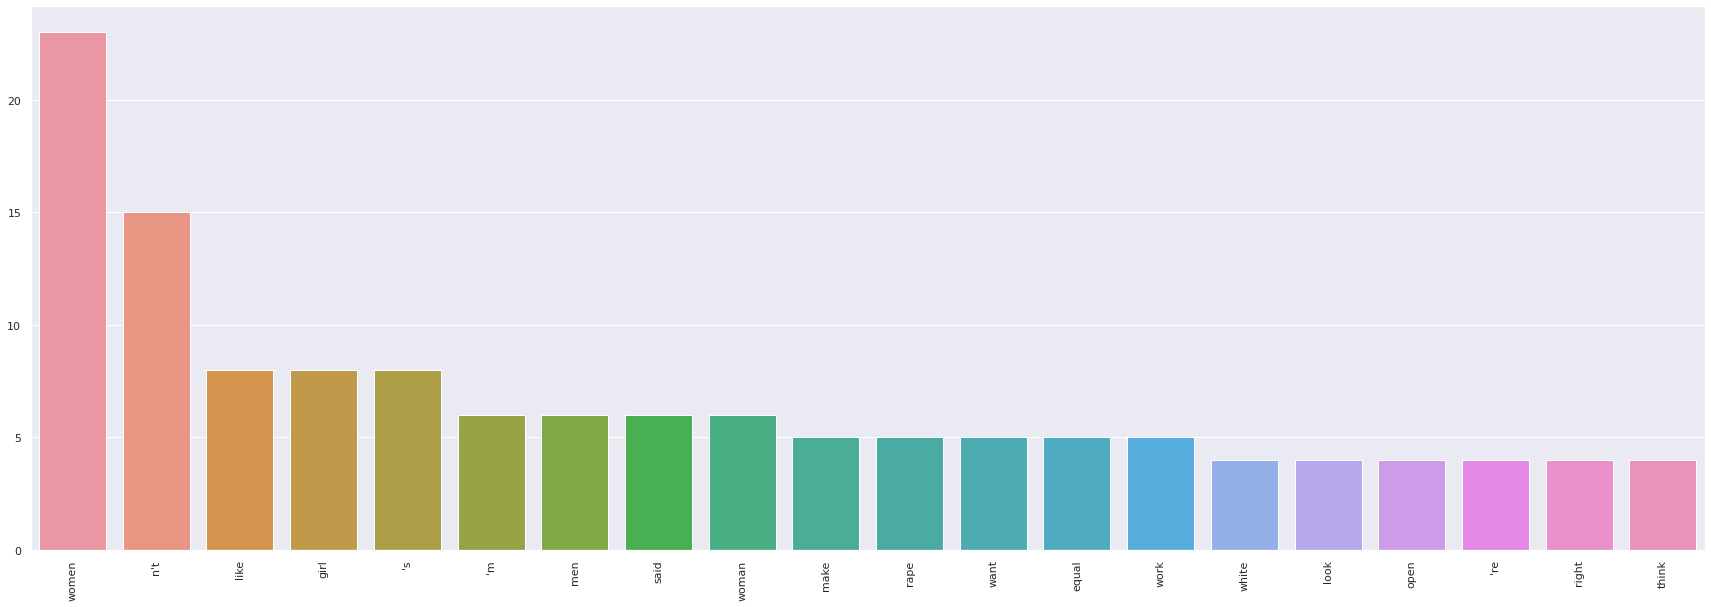

In [444]:
most_frequent = dict(list(word_counts_stemmed_sorted.items())[:20])
plt.figure(figsize=(30,10))
ax = sns.barplot(x=list(most_frequent.keys()), y=list(most_frequent.values()))
ax.tick_params(axis='x', rotation=90)

# Task 2

Since there isn't requirement for embedding, only numerical features will be included.

In [445]:
df.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,Text Transription Tokens,Text Transription Tokens (Lemmatized),Text Transription Tokens (Stemmed)
0,28.jpg,0,0,0,0,0,"not now, dad. We should burn Jon Snow. stop it...","[dad, burn, jon, snow, stop, dad, know, happen...","[dad, burn, jon, snow, stop, dad, know, happen...","[dad, burn, jon, snow, stop, dad, know, happen..."
1,30.jpg,0,0,0,0,0,there may have been a mixcommunication with th...,"[may, mixcommunication, decorator, happy, birt...","[may, mixcommunication, decorator, happy, birt...","[may, mixcommun, decor, happi, birthday, dick,..."
2,33.jpg,0,0,0,0,0,i shouldn't have sold my boat,"[n't, sold, boat]","[n't, sold, boat]","[n't, sold, boat]"
3,58.jpg,1,0,0,0,1,"Bitches be like, It was my fault i made him mad","[bitches, like, fault, made, mad]","[bitch, like, fault, made, mad]","[bitch, like, fault, made, mad]"
4,89.jpg,0,0,0,0,0,find a picture of 4 girls together on FB make ...,"[find, picture, 4, girls, together, fb, make, ...","[find, picture, 4, girl, together, fb, make, c...","[find, pictur, 4, girl, togeth, fb, make, come..."


In [446]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score
import typing

from gensim.models import Word2Vec
import numpy as np

## Data Preparation

In [447]:
y = df['misogynous'].values
X = df.iloc[:,2:4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Classification Models

### Decision Tree

In [448]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest

In [449]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [450]:
def evaluate_model(model, y_test) -> dict:
    y_pred = model.predict(X_test)
    return {'accuracy': accuracy_score(y_test, y_pred), 'f1_score': f1_score(y_test, y_pred), 'precision_score' : precision_score(y_test, y_pred)}

In [451]:
evaluate_model(dt, y_test)

{'accuracy': 0.95, 'f1_score': 0.9333333333333333, 'precision_score': 1.0}

In [452]:
evaluate_model(rf, y_test)

{'accuracy': 0.95, 'f1_score': 0.9333333333333333, 'precision_score': 1.0}

# Task 3

In [453]:
df.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,Text Transription Tokens,Text Transription Tokens (Lemmatized),Text Transription Tokens (Stemmed)
0,28.jpg,0,0,0,0,0,"not now, dad. We should burn Jon Snow. stop it...","[dad, burn, jon, snow, stop, dad, know, happen...","[dad, burn, jon, snow, stop, dad, know, happen...","[dad, burn, jon, snow, stop, dad, know, happen..."
1,30.jpg,0,0,0,0,0,there may have been a mixcommunication with th...,"[may, mixcommunication, decorator, happy, birt...","[may, mixcommunication, decorator, happy, birt...","[may, mixcommun, decor, happi, birthday, dick,..."
2,33.jpg,0,0,0,0,0,i shouldn't have sold my boat,"[n't, sold, boat]","[n't, sold, boat]","[n't, sold, boat]"
3,58.jpg,1,0,0,0,1,"Bitches be like, It was my fault i made him mad","[bitches, like, fault, made, mad]","[bitch, like, fault, made, mad]","[bitch, like, fault, made, mad]"
4,89.jpg,0,0,0,0,0,find a picture of 4 girls together on FB make ...,"[find, picture, 4, girls, together, fb, make, ...","[find, picture, 4, girl, together, fb, make, c...","[find, pictur, 4, girl, togeth, fb, make, come..."


## Data Preparation

In [454]:
X = df.iloc[:,2:4]
y = df['misogynous']

### Creating Embeddings

In [455]:
def get_embeddings(documents:pd.core.series) -> pd.core.series.Series:
    model = Word2Vec(documents, min_count=1, window=5, sg=0)
    model.vector_size = 50
    
    vector = np.vectorize(float)
    embeddings = documents.apply(lambda x: model.wv[x] if len(x) != 0 else np.array([0]*100)).apply(lambda x: x.mean(axis=0))
    
    return embeddings

In [456]:
for feature in df.iloc[:,7:]:
    X[feature] = get_embeddings(df[feature])

In [457]:
X.head()

,shaming,stereotype,Text Transription Tokens,Text Transription Tokens (Lemmatized),Text Transription Tokens (Stemmed)
0,0,0,"[-0.0022049833, 0.0028015303, -0.0009229538, 0...","[-0.00030227032, -0.002432214, -0.0004978726, ...","[-0.0017059249, -0.0019536656, 0.0012478139, -..."
1,0,0,"[-0.0021688174, 0.0018653262, -0.0008104008, 0...","[-0.0027248706, -0.0028352423, -0.0023532992, ...","[-0.0011121804, -0.0012381343, 0.0010542246, 0..."
2,0,0,"[-0.008216332, -0.004183365, -0.0021795277, 0....","[-0.0060501248, 0.0013083895, -0.0009801898, 0...","[-0.0057623596, -0.0019239873, -0.00140737, 0...."
3,0,0,"[-0.0004709689, 0.0023494686, 0.0014288778, -0...","[-0.0037312962, -0.0013672261, -0.0031609782, ...","[0.00089211867, -0.0019160381, -0.00016633663,..."
4,0,0,"[0.0007737968, 0.0022288573, -0.0008721382, 0....","[-0.0009686038, 0.0009915874, 0.0021559603, 0....","[-0.001189589, 0.0015047548, 8.211641e-05, -0...."


In [458]:
y = df['misogynous'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Classification Models

### Decision Tree

In [459]:
X['Text Transription Tokens'][72].shape

(100,)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

### Random Forest

### Support Vector Machine